In [3]:
import os
from pathlib import Path

import pandas as pd
from matplotlib import pyplot as plt

# Get list of all CSV files in the directory
list_of_files = list(Path("../../logs/kw_merging_performance").rglob("*.csv"))

# Find the latest file
latest_file = max(list_of_files, key=os.path.getctime)

# Load the latest CSV file into a DataFrame
df_latest = pd.read_csv(latest_file)
# format: "timestamp","query","excecution_time_with_merging","excecution_time_without_merging","is_consistent","number_of_terms","number_of_results_with_merging","number_of_results_without_merging"

print(df_latest)

               timestamp                                              query  \
0    2025-03-22 13:27:48                                         kw('data')   
1    2025-03-22 13:27:49                                      kw('science')   
2    2025-03-22 13:27:49                                      kw('machine')   
3    2025-03-22 13:27:49                                     kw('learning')   
4    2025-03-22 13:27:49                                   kw('artificial')   
..                   ...                                                ...   
141  2025-03-22 13:28:15  kw('data AND science AND machine AND learning ...   
142  2025-03-22 13:28:16  kw('algorithm AND analytics AND statistics AND...   
143  2025-03-22 13:28:16  kw('clustering AND ensemble AND optimization A...   
144  2025-03-22 13:28:16  kw('analysis AND research AND system AND metho...   
145  2025-03-22 13:28:17  kw('development AND application AND function A...   

     excecution_time_with_merging  excecution_time_

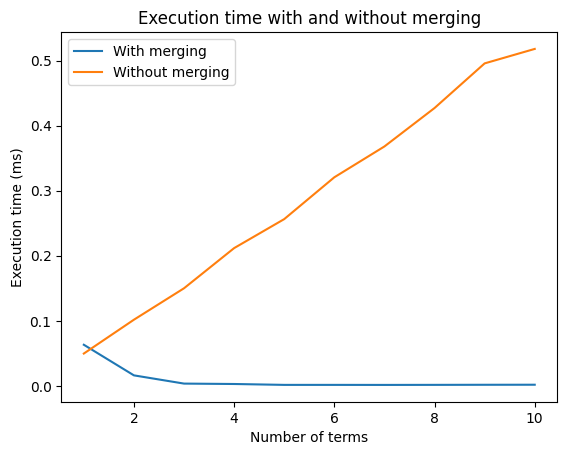

In [ ]:
# Plot the data
# x-axis: number of terms
# y-axis: execution time
mean_df = (
    df_latest.groupby("number_of_terms")
    .agg(
        {
            "excecution_time_with_merging": "mean",
            "excecution_time_without_merging": "mean",
        }
    )
    .reset_index()
)

plt.plot(
    mean_df["number_of_terms"],
    mean_df["excecution_time_with_merging"],
    label="With merging",
)
plt.plot(
    mean_df["number_of_terms"],
    mean_df["excecution_time_without_merging"],
    label="Without merging",
)
plt.xlabel("Number of terms")
plt.ylabel("Execution time (ms)")
plt.title("Mean xecution time with and without merging")
plt.legend()
plt.show()